In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,47716,44436,89416,7127,15729,146,1469919,142928,27993,308070,...,1754911,7806,74206,1,105384,1377,101109,2078,17963,10912
2020-12-09,47851,45188,90014,7162,15804,146,1475222,144066,28000,311002,...,1771545,8104,74352,1,105852,1381,102992,2079,18062,11007
2020-12-10,48053,46061,90579,7190,15925,146,1482216,145240,28011,313688,...,1792611,8487,74498,1,106280,1385,104879,2081,18091,11081
2020-12-11,48116,46863,91121,7236,16061,147,1489328,146317,28025,316581,...,1814395,8849,74811,1,106715,1391,106622,2082,18161,11162
2020-12-12,48229,47742,91638,7288,16161,148,1494602,147312,28030,319822,...,1835949,9180,74811,1,107177,1395,108099,2083,18217,11219


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,200.0,753.0,591.0,43.0,81.0,0.0,3610.0,584.0,6.0,2377.0,...,12386.0,301.0,153.0,0.0,480.0,10.0,1351.0,-305.0,32.0,73.0
2020-12-09,135.0,752.0,598.0,35.0,75.0,0.0,5303.0,1138.0,7.0,2932.0,...,16634.0,298.0,146.0,0.0,468.0,4.0,1883.0,1.0,99.0,95.0
2020-12-10,202.0,873.0,565.0,28.0,121.0,0.0,6994.0,1174.0,11.0,2686.0,...,21066.0,383.0,146.0,0.0,428.0,4.0,1887.0,2.0,29.0,74.0
2020-12-11,63.0,802.0,542.0,46.0,136.0,1.0,7112.0,1077.0,14.0,2893.0,...,21784.0,362.0,313.0,0.0,435.0,6.0,1743.0,1.0,70.0,81.0
2020-12-12,113.0,879.0,517.0,52.0,100.0,1.0,5274.0,995.0,5.0,3241.0,...,21554.0,331.0,0.0,0.0,462.0,4.0,1477.0,1.0,56.0,57.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
US                219510.0
Brazil             43900.0
India              30254.0
Turkey             29136.0
Russia             27729.0
Germany            21792.0
United Kingdom     21554.0
Italy              19902.0
Ukraine            13219.0
Mexico             12057.0
Poland             11499.0
Netherlands         9178.0
Iran                8411.0
Colombia            8163.0
South Africa        7882.0
Indonesia           6388.0
Romania             6333.0
Czechia             6217.0
Canada              5984.0
Serbia              5679.0
Name: 2020-12-12 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

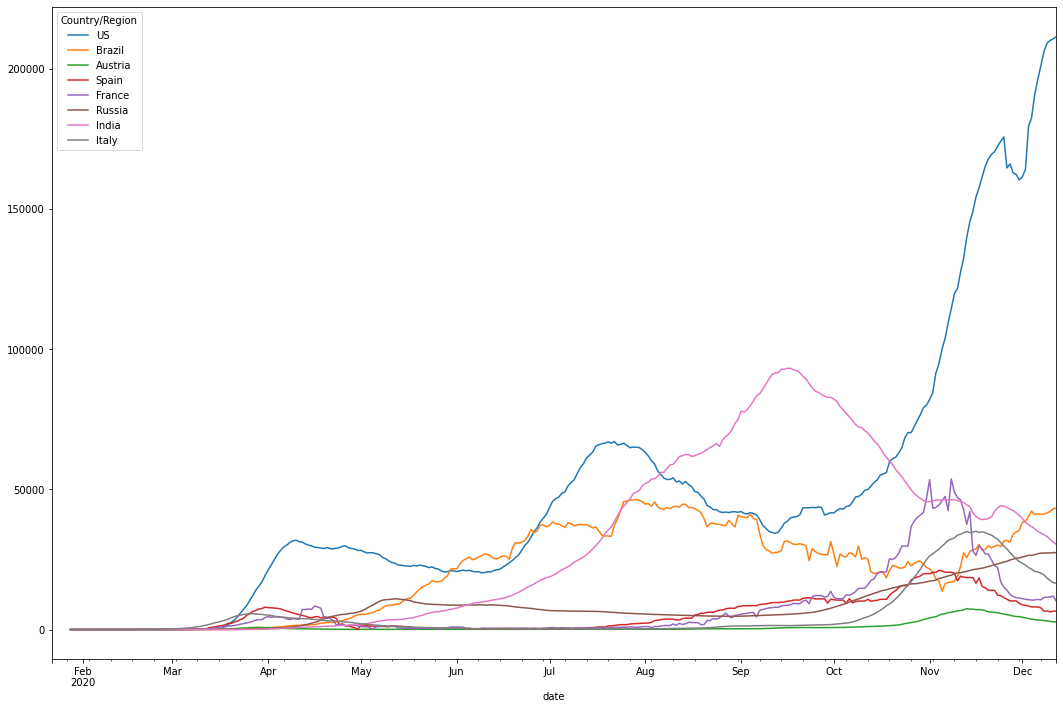

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

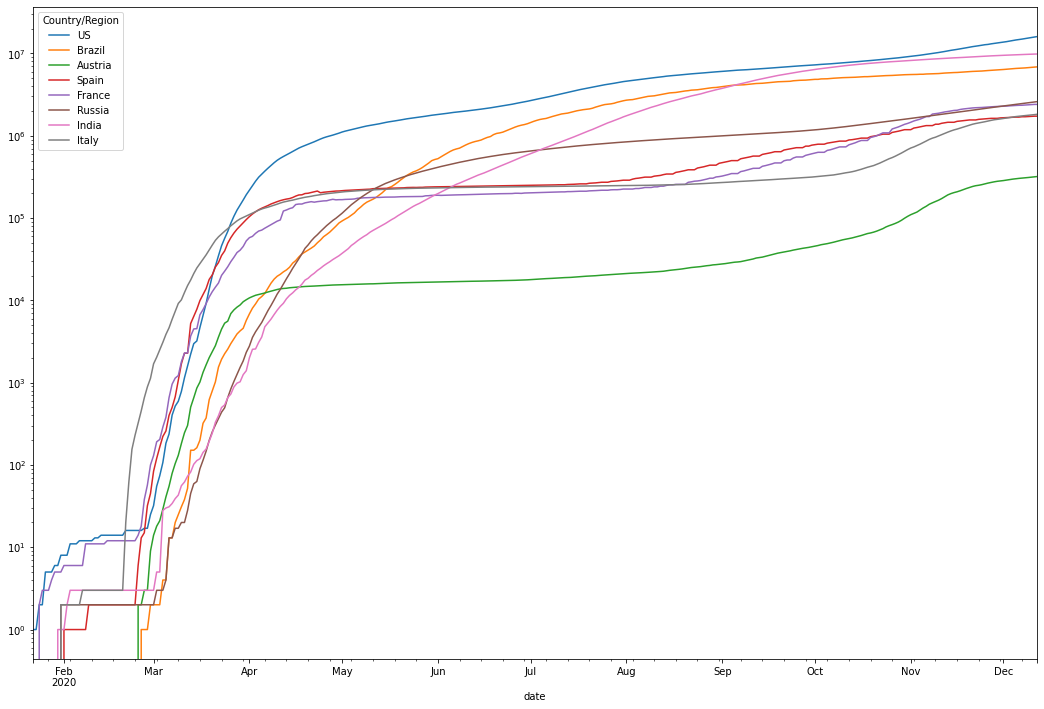

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,1906,936,2539,78,355,4,40009,2372,908,4002,...,62130,86,611,0,928,35,867,606,364,303
2020-12-09,1919,951,2554,78,358,4,40222,2393,908,4056,...,62663,87,611,0,933,35,890,606,364,304
2020-12-10,1935,965,2564,78,362,4,40431,2416,908,4163,...,63179,90,611,0,938,35,910,606,364,305
2020-12-11,1945,977,2575,78,365,4,40606,2445,908,4289,...,63603,90,612,0,944,35,931,606,365,306
2020-12-12,1956,989,2584,78,366,4,40668,2462,908,4415,...,64123,91,612,0,949,35,961,606,366,307


#### Countries with the biggest numbers of deaths in the last day

In [36]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                2368.0
Brazil             686.0
Mexico             685.0
Italy              649.0
Russia             553.0
United Kingdom     520.0
Poland             502.0
India              391.0
Germany            333.0
Ukraine            250.0
Iran               222.0
Turkey             222.0
Colombia           197.0
Hungary            162.0
South Africa       154.0
Name: 2020-12-12 00:00:00, dtype: float64

#### Countries with the biggest numbers of deaths

In [9]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                297818
Brazil            181123
India             143019
Mexico            113704
United Kingdom     64123
Italy              64036
France             57671
Iran               51949
Spain              47624
Russia             45923
Argentina          40668
Colombia           38866
Peru               36544
South Africa       23106
Poland             22676
Name: 2020-12-12 00:00:00, dtype: int64

In [10]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-12-08,2546.0,842.0,105.0,0.0,840.0,552.0,402.0,634.0
2020-12-09,3124.0,836.0,54.0,373.0,299.0,546.0,412.0,499.0
2020-12-10,2768.0,770.0,107.0,325.0,292.0,549.0,413.0,887.0
2020-12-11,3309.0,672.0,126.0,280.0,627.0,601.0,443.0,761.0
2020-12-12,2368.0,686.0,126.0,0.0,0.0,553.0,391.0,649.0


### New Deaths (moving average, 7 days)

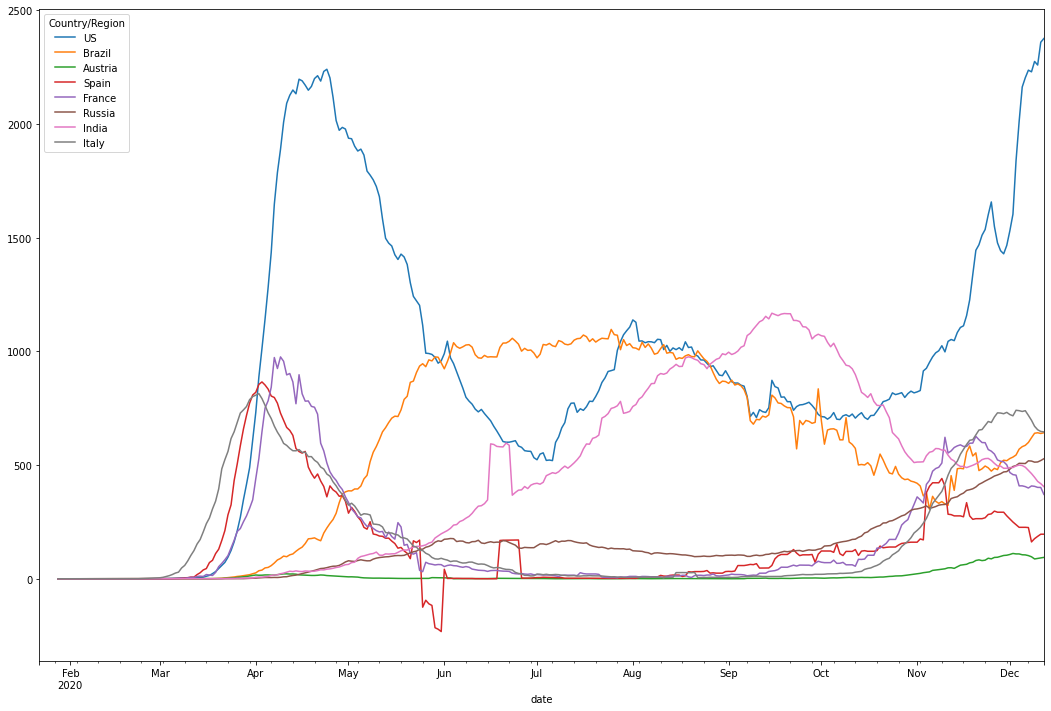

In [11]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

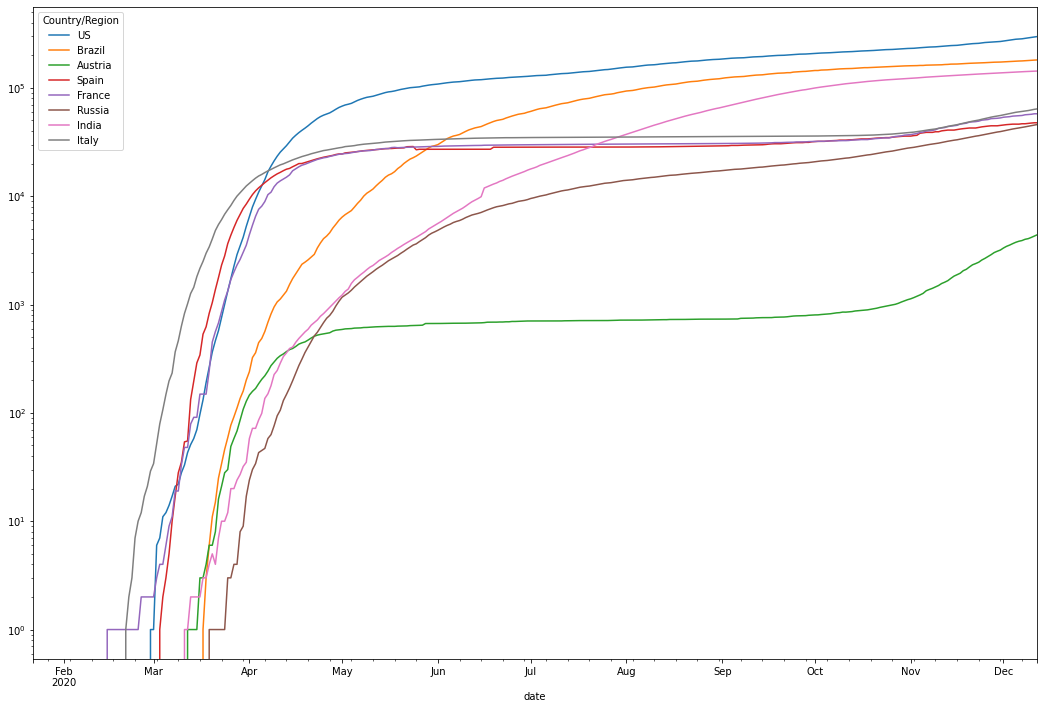

In [12]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [13]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-12-08,72358.0,67966.0,5503.0,0.0,1639.0,24471.0,36635.0,25497.0
2020-12-09,102981.0,626.0,3501.0,0.0,1379.0,25846.0,37725.0,39266.0
2020-12-10,95151.0,77101.0,3850.0,0.0,1411.0,25427.0,37503.0,30099.0
2020-12-11,150267.0,35068.0,3838.0,0.0,1233.0,25869.0,33519.0,24169.0
2020-12-12,111291.0,0.0,4380.0,0.0,0.0,25704.0,33136.0,24728.0


### New Recovered (moving average, 7 days)

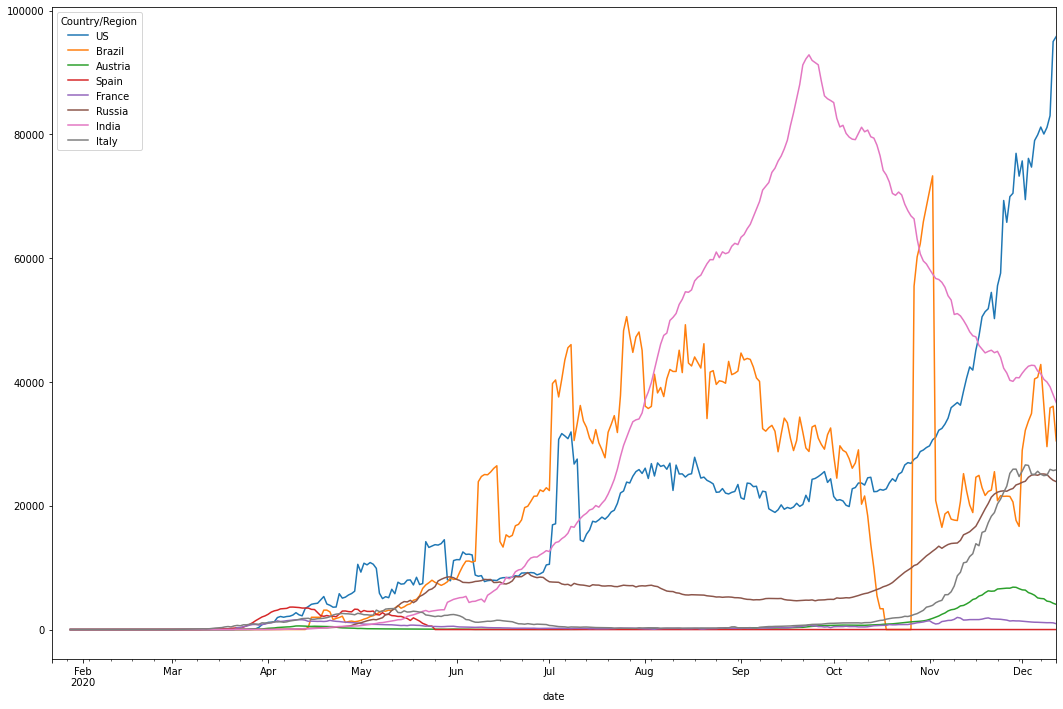

In [15]:
df_daily_recovered[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [16]:
df_recovered.loc["2020-02-23","Italy"] = 1

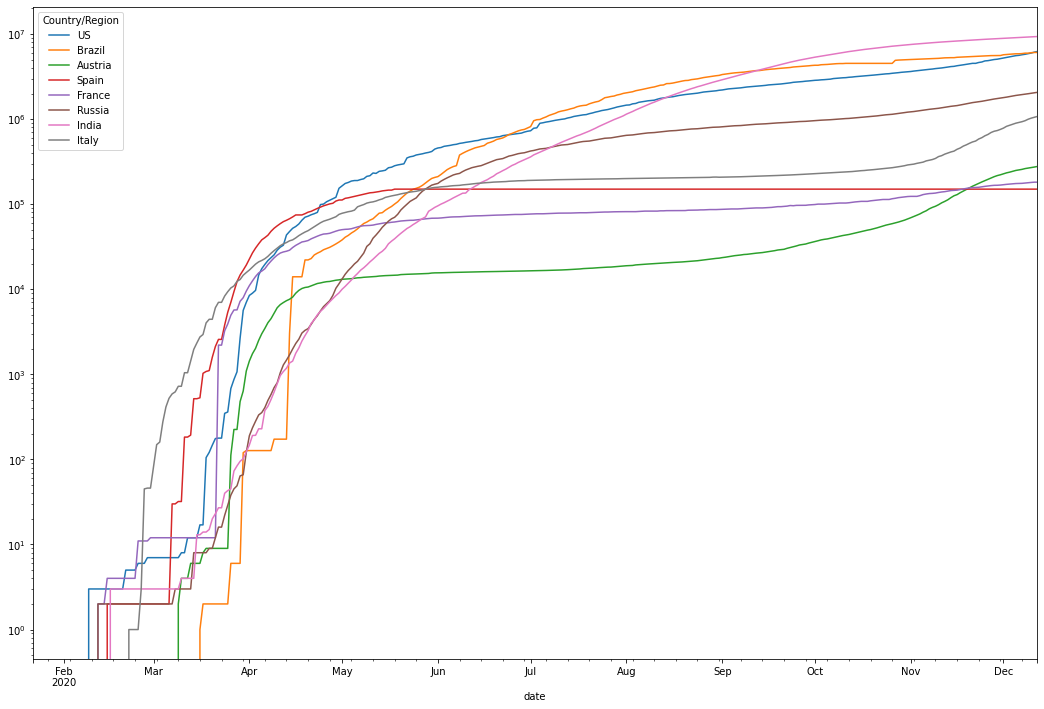

In [17]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [18]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [19]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [20]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [21]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [22]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [23]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [24]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [25]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [26]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [27]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [28]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [29]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [30]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

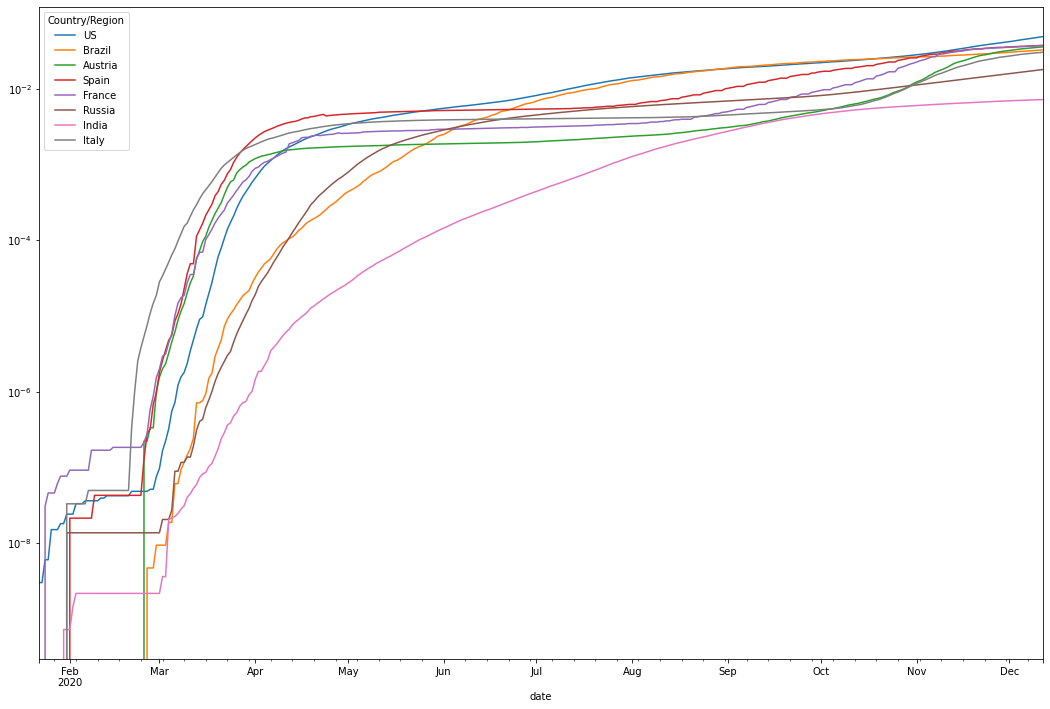

In [31]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

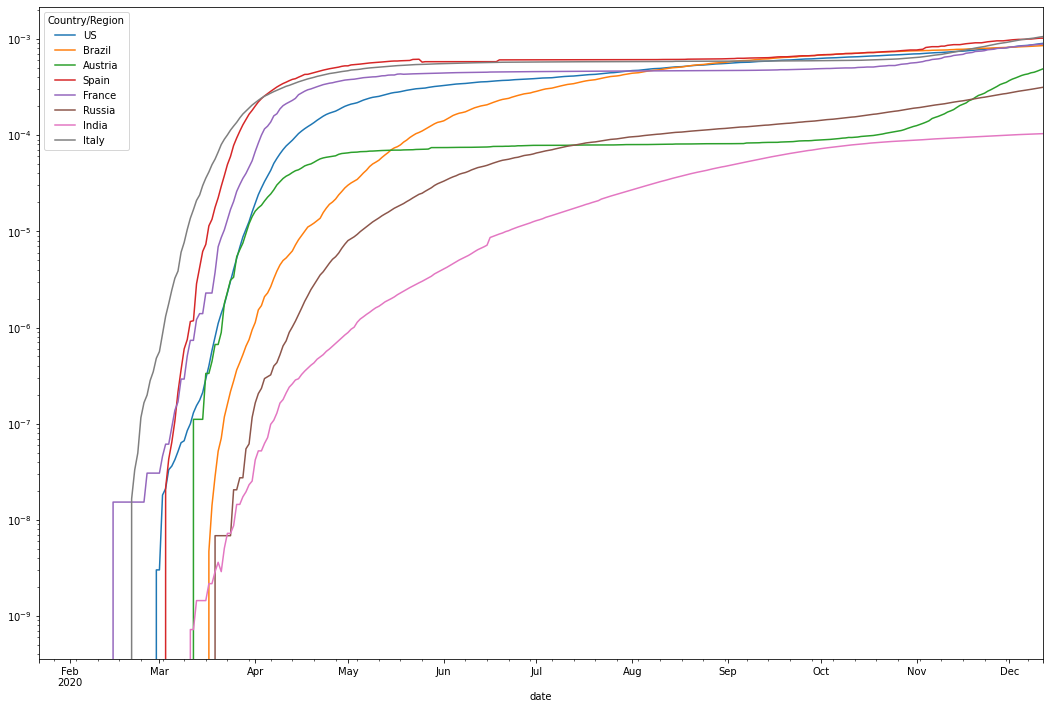

In [32]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

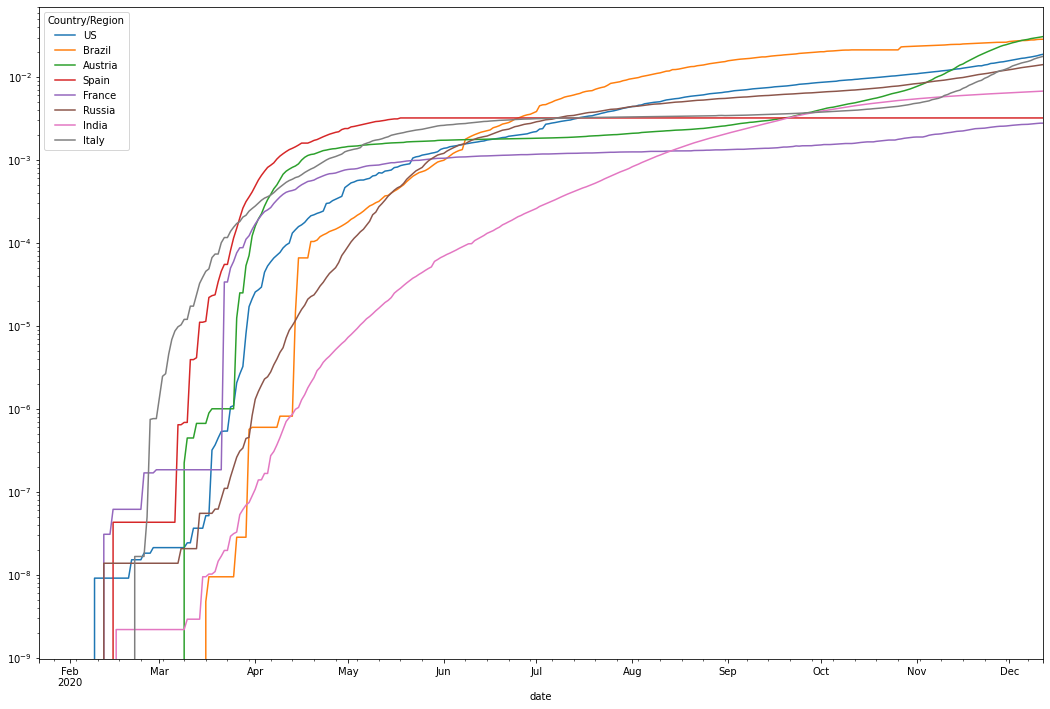

In [33]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

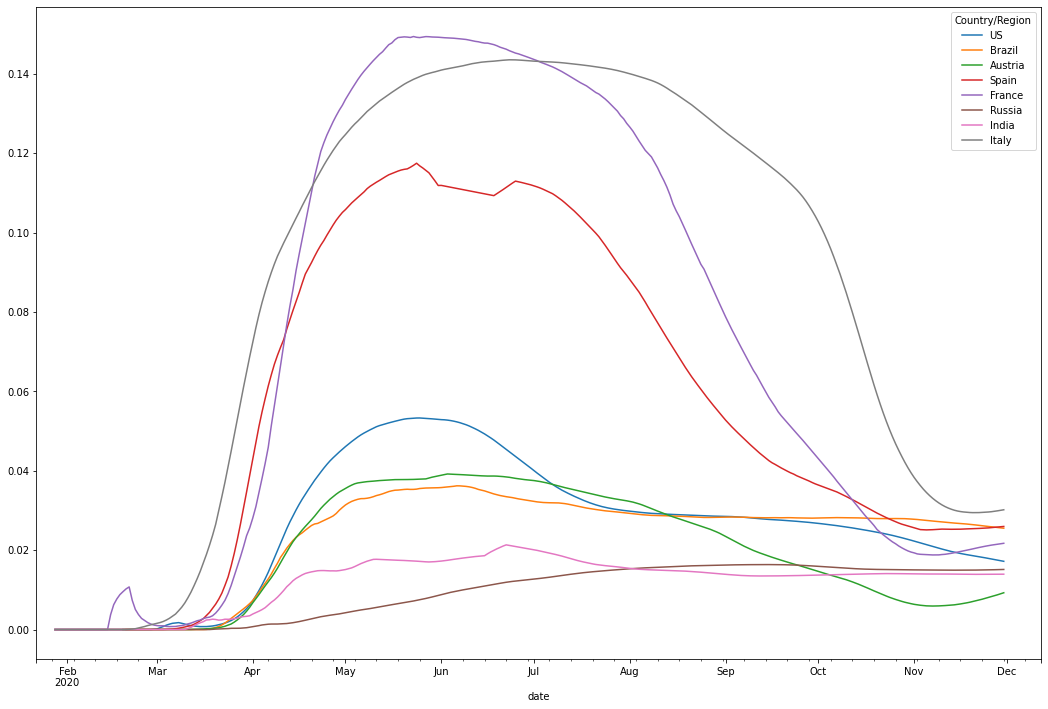

In [48]:
ratio = df_deaths/df_cases.shift(-12)
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()